# Final Project
## Students: Nafis Banirazi & Jan Carbonell
### Lab Objective:
The Objectives of this project are the following

In [1]:
#intial set of imports
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.metrics import jaccard_distance
from nltk.stem import WordNetLemmatizer
from nltk.wsd import lesk
import string

#variable initialization and instantiation
d = {}
j = [0]
tests = []
corpus = []
tests = []
golden_std = []

## 1. Read all pairs of sentences of the train and test set
We proceed to open and read the input file

In [2]:
def text_to_sentences(filename):
    sentence_pair_array = []
    for line in open(filename, encoding="UTF8").readlines():
        sentence_pair_array.append([s.strip() for s in line.split("\t")])
    return sentence_pair_array

train_input = text_to_sentences('../00_data/train/STS.input.MSRpar.txt')
test_input = text_to_sentences('../00_data/test-gold/STS.input.MSRpar.txt')
train_classes = open('../00_data/train/STS.gs.MSRpar.txt', encoding="utf-8-sig").readlines()
test_classes = open('../00_data/test-gold/STS.gs.MSRpar.txt', encoding="UTF8").readlines()

## 2. Noisy entities removal functions
### Stopwords, URL's, Punctuations

In [3]:
# Removing the punctuation and lowering the case of a string
def remove_punctuation(line):
    return line.translate(str.maketrans('', '', string.punctuation))

## 3. Word normalization
### Tokenization, Lemmatization, Stemming

In [4]:
# extract the words from the sentence
def words_from_sent(sent):
    # tokenized
    tokenized = nltk.word_tokenize(sent)
    # remove stopwords and return
    return [word for word in tokenized if word not in nltk.corpus.stopwords.words('english')]

# convert words to tokens
def tokens_from_words(words):
    return pos_tag(words)

# Function to get wordnet pos code
def wordnet_pos_code(tag):
    if tag.startswith('NN'):
        return wordnet.NOUN
    elif tag.startswith('VB'):
        return wordnet.VERB
    elif tag.startswith('JJ'):
        return wordnet.ADJ
    elif tag.startswith('RB'):
        return wordnet.ADV
    else:
        return None

# Tokens to lemmas using wordnet lemmatizer    
def tokens_to_lemmas(tokens):
    return list(map(token_to_lemmas, tokens))

def token_to_lemmas(token):    
    pos = wordnet_pos_code(token[1])
    if pos:
        return WordNetLemmatizer().lemmatize(token[0], pos=pos)
    return token[0]


## 4. Word Standarization
### Regular Expression 


## Evaluation

In [ ]:
%matplotlib inline

In [26]:
# evaluation imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

# from sklearn import preprocessing
# from sklearn import utils
# from sklearn.svm import SVR

#True/False Positive: https://uberpython.wordpress.com/2012/01/01/precision-recall-sensitivity-and-specificity/

def count(g,s):
    TP = TN = FP = FN = 0
    for i in range(0,len(g)):
        if (g[i]==s[i] and s[i]==1): TP+=1
        if (g[i]==s[i] and s[i]==0): TN+=1
        if (g[i]!=s[i] and s[i]==1): FP+=1
        if (g[i]!=s[i] and s[i]==0): FN+=1
    return [TP,TN,FP,FN]

def MSRP_eval(gs, sys):
    [TP,TN,FP,FN] = count(gs,sys)
    acc = (TP+TN)/float(TP+TN+FP+FN) # ACCURACY
    reject = TN/float(TN+FP) # precision on negative SPECIFICITY
    accept = TP/float(TP+FN) # precision on positive SENSITIVITY
    print("acc=",acc," reject=",reject," accept=",accept)

## 5. Main program


In [56]:
'''
    First Paraphrase detector approach, jaccard distance of lemmas    
'''
def lemma_jaccard(sent_0, sent_1):
    #print('.', end='')
    sent_0, sent_1 = remove_punctuation(sent_0.lower()), remove_punctuation(sent_1.lower())
    print(sent_0 + '\n' + sent_1 + '\n')
    words_0, words_1 = words_from_sent(sent_0), words_from_sent(sent_1)
    tokens_0, tokens_1 = tokens_from_words(words_0), tokens_from_words(words_1)
    lemmas_0, lemmas_1 = tokens_to_lemmas(tokens_0), tokens_to_lemmas(tokens_1)
    
    #jaccard_similarity
    print (5 *float(1 - jaccard_distance(set(lemmas_0), set(lemmas_1))), '\n')
    return 5*float(1 - jaccard_distance(set(lemmas_0), set(lemmas_1)))


In [57]:
print('Training')
training_data_X = [lemma_jaccard(data[0], data[1]) for data in train_input]
training_scores_Y = [float(line.strip()) for line in train_classes]
print('Finished Training!\n')

print('Testing')
testing_data_X = [lemma_jaccard(data[0], data[1])for data in test_input]
testing_scores_Y = [float(line.strip()) for line in test_classes]
print('Finished Testing!\n')

print('Results')
#maybe label encoding https://www.kaggle.com/pratsiuk/valueerror-unknown-label-type-continuous
#print(training_data_X)
#print('########################################################################\n')
#print(np.array(training_data_X).reshape(-1,1))
#print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\n')
#print(training_scores_Y)

#creating linear regression object
regression = linear_model.LinearRegression()

# Train the model using the training sets
regression.fit(np.array(training_data_X).reshape(-1,1), training_scores_Y)

# Make predictions using the testing set
prediction = regression.predict(np.array(testing_data_X).reshape(-1,1))
# MSRP_eval(prediction, 1000*np.array(testing_scores_Y))
print('Results are ready!\n')

Training
but other sources close to the sale said vivendi was keeping the door open to further bids and hoped to see bidders interested in individual assets team up
but other sources close to the sale said vivendi was keeping the door open for further bids in the next day or two

2.368421052631579 

micron has declared its first quarterly profit for three years
microns numbers also marked the first quarterly profit in three years for the dram manufacturer

2.5 

the fines are part of failed republican efforts to force or entice the democrats to return
perry said he backs the senates efforts including the fines to force the democrats to return

1.7857142857142856 

the american anglican council which represents episcopalian conservatives said it will seek authorization to create a separate group
the american anglican council which represents episcopalian conservatives said it will seek authorization to create a separate province in north america because of last weeks actions

3.05555555

2.1875 

of 24 million phonedin votes 5028 percent were for studdard putting him 130000 votes ahead of aiken
of the 24 million phone votes cast studdard was only 130000 votes ahead of aiken

2.692307692307692 

consumers still would have to get a descrambling security card from their cable operator to plug into the set
to watch pay television consumers would insert into the set a security card provided by their cable service

1.7647058823529411 

however we have decided to opt for the european consortiums engine as the best overall solution and due to the substantial price efforts made
however we have decided to opt for the european consortiums engine as the best overall solution

3.214285714285714 

the food and drug administration rejected imclones 2001 application to sell erbitux citing shoddy research
the us food and drug administration rejected imclones original application in december 2001 saying the trial had been sloppily conducted

1.842105263157895 

critics say the law viola

3.5 

linda saunders pleaded guilty in federal court to six charges including extortion money laundering and conspiracy
former phipps aides linda saunders and bobby mclamb have both pleaded guilty to federal charges including extortion

2.2222222222222223 

vivendi shares closed 38 percent up in paris at 1578 euros
vivendi shares were 03 percent up at 1562 euros in paris at 0841 gmt

2.083333333333333 

microsoft has identified the freely distributed linux software as one of the biggest threats to its sales
the company has publicly identified linux as one of its biggest competitive threats

1.923076923076923 

antonio monteiro de castro 58 currently director of the group’s latin america  caribbean operations will become chief operating officer from the same date
bat also said antonio monteiro de castro director for latin america and the caribbean would become chief operating officer on january 1 2004

2.4 

spin and manipulative public relations and propaganda are not the answer it sai

3.0 

close cooperation between lawenforcement agencies and intelligence services lie at the heart of the ongoing fight against terrorism mr howard said
close cooperation between regional law enforcement agencies and intelligence services was at the heart of the fight against terrorism he said

2.6470588235294117 

in 2006 the group says the market will rebound 296 percent to 213 billion in sales
in 2006 asia pacific will report growth of 79 percent to 818 billion

0.9375 

captain robert ramsey of the us 1st armoured division said a truck had exploded outside the building about 11am and that one of the compounds outer walls had collapsed
captain robert ramsey of us 1st armored division said a truck had exploded outside the building at around 11 am

2.619047619047619 

they came despite what ba called a difficult quarter which it said included unofficial industrial action at heathrow
ba said the second quarter which included unofficial industrial action at heathrow had been difficult



1.8518518518518516 

a federal grand jury indicted them on tuesday the document was sealed until yesterday to allow authorities to make arrests
federal officials said the document remained sealed until thursday morning to allow authorities to make arrests in five western states

1.75 

people who have opposed these actions throughout are now trying to find fresh reasons to say this wasnt the right thing to do
what is happening here is that people who have opposed this action throughout are trying to find fresh reasons why it was not the right thing to do

3.846153846153846 

klarman was arrested by fbi agents in the hamptons an exclusive summer resort enclave east of new york city
klarman was arrested by fbi agents monday morning at his home in new york

1.875 

the bishop told police he thought he had hit a dog or a cat or that someone had thrown a rock at his vehicle
bishop obrien aged 67 had told police he thought he had hit a dog or cat

2.0 

the report also claims that there will

1.25 

americans dont cut and run we have to see this misadventure through she said
she also pledged to bring peace to iraq americans dont cut and run we have to see this misadventure through

2.5 

at 12 months there was still a difference in function although it was not a significant one
at 12 months there was still a difference between the groups but it was not considered significant

2.5 

there is no doubt about the chemical programme biological programme indeed nuclear programme indeed all that was documented by the un he said
he added there is no doubt about the chemical programme the biological programme and indeed the nuclear weapons programme

2.727272727272727 

it just seems like all the issues that we support he doesnt said gabriela lemus of lulac
it just seems like all the issues that we support he doesnt said gabriela lemus the leagues director of policy and legislation

3.076923076923077 

citygrown pollution and ozone in particular is tougher on country trees says corn

4.0 

police believe wilson shot reynolds then her mother once in the head before fatally turning the gun on herself
police believe wilson then shot jennie mae robinson once in the head before turning the gun on herself

2.692307692307692 

on july 22 moore announced he would appeal the case directly to the us supreme court
moore of alabama says he will appeal his case to the nations highest court

1.3333333333333335 

the monkeys could track their progress by watching a schematic representation of the arm and its motions on a video screen
the arm was kept in a separate room but the monkeys could track their progress by watching a representation of the arm and its motions on a video screen

3.5714285714285716 

that triggered a 47hour police standoff that inconvenienced thousands of commuters as traffic backed up in downtown washington and northern virginia
his protest led to a 47hour standoff with police that caused huge traffic jams in downtown washington and northern virginia

2.222

2.1428571428571432 

mediaqs customers include major handheld makers mitsubishi siemens palm sharp philips dell and sony
nvidia will take advantage of mediaq customers which include such players as siemens ag sharp philips dell mitsubishi and sony corp

2.0 

aventis based in strasbourg france is one of a handful of companies that still make the flu vaccine
aventis based in strasbourg france is one of the leading producers of the vaccine and one of a handful of companies that still make it

3.846153846153846 

the dow jones industrial average dji was off 5869 points or 064 percent at 913786
the dow jones industrial average dji fell 7943 points or 086 percent to 911712 on friday

2.3333333333333335 

it was a little bit embarrassing the way we played in the first two games thomas said
were in the stanley cup finals and it was a little bit embarrassing the way we played in the first two games

3.076923076923077 

from broadway comedies like the seven year itch 1952 will success spoil roc

1.9047619047619047 

an arrest warrant claimed bryant assaulted the woman june 30 at a hotel
according to an arrest warrant bryant 24 attacked a woman on june 30

2.5 

florida sen bob graham was not identifiable by 61 percent of those polled
kerry was viewed favorably by 66 percent of those polled dean at 57 percent

0.7142857142857145 

the broader standard  poors 500 index spx rose 347 points or 036 percent to 97759
the techladen nasdaq composite index ixic shed 8 points or 045 percent to 1645

0.7500000000000001 

as a result 24 players broke par in the first round
twentyfour players broke par in the first round the third highest figure in us open history

1.7857142857142856 

those conversations had not taken place as of tuesday night according to an oracle spokeswoman
those talks have not taken place according to an oracle spokeswoman

2.7777777777777777 

friends of robert de niro yesterday rallied around him after he was diagnosed with prostate cancer
hollywood actor robert de 

1.4285714285714284 

hispanics the fastest growing ethnic group in the us have overtaken blacks to become the largest minority in the us according to newly released government figures
hispanics have officially overtaken african americans as the largest minority group in the us according to a report released by the us census bureau

1.5217391304347827 

the bishop of armidale peter brain was forthright
he hasnt got much choice said the bishop of armidale peter brain

2.0 

when fully operational the facility is expected to employ up to 1000 people
the plant would employ 1000 people when fully built out the company said

1.666666666666667 

kollarkotelly has scheduled another antitrust settlement compliance hearing for january
the judge scheduled another oversight hearing for late january

1.25 

the american stock exchange biotech index btk surged 5 percent
the philadelphia stock exchanges semiconductor index soxx jumped 610 percent

1.4285714285714284 

tomorrow at the mission inn i ha

2.5 

the broad standard  poors 500 index spx gained 1972 points or 198 percent to 101569
the dow jones industrial average dji jumped 209 percent while the standard  poors 500 index spx leapt 223 percent

1.4285714285714284 

it will also help reform the royal solomon islands police strengthen the courts and prisons system and protect key institutions such as the finance ministry from intimidation
the intervention force will confiscate weapons reform the police strengthen the courts and prison system and protect key institutions such as the finance ministry

2.619047619047619 

mr alibek said our outcomes are very encouraging
our outcomes are very encouraging george mason researcher ken alibek said

2.2222222222222223 

selenski descended down the wall and used the mattress to climb over razor wire
selenski used the mattress to scale a 10foot razor wire fischi said

2.083333333333333 

a jury convicted rapper cmurder also known as corey miller of seconddegree murder tuesday night in th

2.3529411764705883 

the 6th us circuit court of appeals on wednesday ruled that an ohio law banning a controversial lateterm abortion method passes constitutional muster and the state can enforce it
an ohio law that bans a controversial lateterm abortion procedure is constitutionally acceptable and the state can enforce it a federal appeals court ruled yesterday

2.291666666666667 

the nasdaq composite index advanced 2059 or 13 percent to 161650 after gaining 57 percent last week
the technologylaced nasdaq composite index ixic climbed 1911 points or 12 percent to 161502

1.0526315789473684 

revenue rose 39 percent to 163 billion from 157 billion
the mclean virginiabased company said newspaper revenue increased 5 percent to 146 billion

0.9999999999999998 

in january 2000 notebooks represented less than 25 percent of sales volume
that compares with january 2000 when laptops represented less than 25 percent of sales volume npd said

3.076923076923077 

argentine guillermo coria and n

0.8333333333333331 

a floating airfield with a flight deck covering 45 acres the ship took about five years to build
the reagan a floating airfield with a flight deck covering 45 acres is the ninth nimitzclass carrier to be built at the newport news shipyard

2.1052631578947367 

im very proud of the citizens of this state said gov john baldacci a casino foe
i´m very proud of the citizens of this state gov john baldacci said after votes from tuesday´s referendum were counted

2.3333333333333335 

stout previously worked for general electric subsidiary ge capital service inc where he was vice president and chief technology and information officer
stout comes to sprint from ge capital where he served as chief technology and information officer

1.842105263157895 

only intel corps 03 percent yield was lower
only intel corp has a lower dividend yield

1.875 

an injured woman coworker also was hospitalized and was listed in good condition
a woman was listed in good condition at memorials

2.1875 

customers that pay the 1219 entrance fee get sms 2003 with 10 device client access licenses
retail pricing for sms 2003 with 10 device client access licenses is 1219

2.1875 

results of the 2001 aboriginal peoples survey released yesterday by statistics canada suggest living standards have improved but still lag for those off reserves
the 2001 aboriginal peoples survey released wednesday by statistics canada says living standards have improved but still lag for the inuit and those who leave their often impoverished reserves

2.954545454545454 

the recent turnaround in the stock market and an easing in unemployment claims should keep consumer expectations at current levels and may signal more favorable economic times ahead
the recent turnaround in the stock market and an easing in unemployment claims may signal more favorable economic times ahead she said

3.4210526315789473 

while the days trading was lackluster the standard  poors 500 index was preparing to close out its b

3.214285714285714 

geraldine andrews the pastors daughterinlaw said robinson recently took her daughter out of a mental health facility
geraldine andrews reynolds daughterinlaw and a friend of wilsons family said robinson had recently taken wilson out of a mental health facility

2.6470588235294117 

he wounded a security guard and then fled stabbing two passersby as he ran off along the promenade
he then stabbed two passersby as he fled along a promenade by the mediterranean sea

2.5 

he and his colleagues attributed some of the communication gap to doctors feeling pressed for time
he attributed some of the communication gap to doctors feeling pressed for time patients cited discomfort discussing financial issues

2.5 

state police said as many as 30 workers were trapped immediately after the garage collapsed
as many as 30 people were believed to be trapped inside initially the state police said

1.666666666666667 

before thursdays matinee baker called a clubhouse meeting concerne

2.5 

buoyed by some of the advice imparted by nicklaus howell shot an 8under 64 for a onestroke lead over kenny perry
buoyed by advice imparted by nicklaus howell shot an 8under 64 on thursday to enter todays round with a onestroke lead over kenny perry

3.75 

so in his state of the union address in january bush declared that the british government has learned that saddam hussein recently sought significant quantities of uranium from africa
in his jan 28 state of the union message bush said the british government has learned that saddam hussein recently sought significant quantities of uranium from africa

3.333333333333334 

net revenue rose to 399 billion from 385 billion during the same quarter last year
that is up from 114 billion during the same quarter last year

2.0 

if its a bill gates comdex keynote it must be time for new tablet pcs
if its the sunday night before comdex it must be time for yet another bill gates keynote

2.307692307692308 

according to reports knight alle

3.0 

stanford 5117 and rice 5712 will play for the national championship tonight
rice 5712 and stanford 5117 will meet in a winnertakeall matchup at 605 pm monday

1.4285714285714284 

the economy nonetheless has yet to exhibit sustainable growth
but the economy hasnt shown signs of sustainable growth

1.666666666666667 

a 32count indictment strikes at one of the very top targets in the drug trafficking world us attorney marcos jimenez said
the newly unsealed 32count indictment alleges money laundering and conspiracy and strikes at one of the very top targets in the drugtrafficking world jiménez said

1.8181818181818183 

a soldier was killed monday and another wounded when their convoy was ambushed in northern iraq
on sunday a us soldier was killed and another injured when a munitions dump they were guarding exploded in southern iraq

1.1764705882352944 

the commission estimated california lost 937 million to corporate tax shelters in 2001
californias lost tax revenue was mostly du

3.0 

the family owns cheetahs strip clubs here and in las vegas
the searches were conducted simultaneously with raids on strip clubs in san diego and las vegas

1.0714285714285716 

the new bill would have medicare cover 95 percent of drug costs over 5100
above that seniors would be responsible for 100 percent of drug costs until the outofpocket total reaches 3600

1.1764705882352944 

several thousand 3rd infantry troops including the 3rd brigade combat team based at fort benning in columbus began returning last week
a few thousand troops most from the divisions 3rd brigade combat team based at fort benning in columbus began returning last week with flights continuing through friday

3.333333333333334 

the study also found that consumer goods advertisers continued to spend the most dollars online representing 35 of all web advertising
in the second quarter consumer advertisers continued to spend the most online slightly increasing their share

1.3157894736842106 

prairie dogs sold 

3.0 

she countersued for 125 million saying gruner  jahr broke its contract with her by cutting her out of key editorial decisions
she countersued for 125 million saying gj broke its contract with her by cutting her out of key editorial decisions and manipulated the magazines financial figures

2.9411764705882355 

the standard edition is 15000 per processor or 300 per named user
the standard edition one is a single processor version of the oracle standard edition database

1.1538461538461537 

results from no 2 us soft drink maker pepsico inc nyse pep  news  people were likely to be in the spotlight
wall street was also waiting for aluminum maker alcoa inc nyse pep  news  people to report earnings after the close

1.3043478260869568 

microsoft acquired virtual pc when it bought the assets of connectix earlier this year
microsoft acquired virtual pc from its developer connectix earlier this year

2.727272727272727 

taylors aides warn an abrupt departure could trigger more chaos a vi

0.9375 

the dvdcca then appealed to the state supreme court
the dvd cca appealed that decision to the us supreme court

1.666666666666667 

we believe we are fully prepared to roll out the touchscreen machines for the 2004 presidential primary said gilles w burger state board of elections chairman
we believe we are fully prepared to roll out the revised diebold machines said gilles w burger chairman of the maryland state board of elections

3.25 

countrymusic station kkcs has suspended two disc jockeys for playing songs by the dixie chicks in violation of a ban imposed after one group member criticized president george bush
a radio station has suspended two disc jockeys for locking themselves in the studio and continuously playing dixie chicks songs violating the stations twomonthold ban on the groups music

1.9642857142857144 

the technologylaced nasdaq composite index ixic jumped 26 points or 178 percent to 1516
the broad standard  poors 500 index spx was up 879 points or 096 perc

4.090909090909091 

the standard  poors 500 stock index ended the quarter up 120 points a gain of 14 percent the best performance for that broad market benchmark since 1998
the standard and poors 500stock index a broad collection of equities representing leading companies finished its best quarter yesterday since the last three months of 1998

1.3333333333333335 

the next court session will be when the threejudge tribunal announces its verdict in midfebruary
the courts threejudge tribunal was expected to give its verdict next february

2.272727272727273 

he started in the 1983 super bowl which miami lost 2717 to washington
he played four seasons in miami including the dolphins 2717 loss to washington in the super bowl

1.7857142857142856 

the consensus among wall street analysts was for a loss of 28 cents a share
analysts surveyed by first call were expecting sales of 723 million and a loss of 28 cents a share

1.5625 

i know of no pressure said mr feith the under secretary of defe

3.4375 

the average american makes four trips a day 45 percent for shopping or errands
nearly half  45 percent  are for shopping or running errands

1.5384615384615385 

mr bush had sought to store his papers in his fathers presidential library where they would have stayed secret for a halfcentury
in texas public watchdog groups opposed mr bushs efforts to house his papers at his fathers presidential library where they would have remained secret for a halfcentury

2.25 

in 1999 the buildings owners the port authority of new york and new jersey issued guidelines to upgrade the fireproofing to a thickness of 1 inches
the nist discovered that in 1999 the port authority issued guidelines to upgrade the fireproofing to a thickness of 1 12 inches

2.7777777777777777 

its also a strategic win for overture given that knight ridder had the option of signing on googles services
its also a strategic win for overture given that knight ridder had been using googles advertising services

3.461538

1.3333333333333335 

as of tuesday almost 250 healthcare workers were in quarantine
in addition 6800 people were in quarantine and thousands of healthcare workers in working quarantine

1.3636363636363635 

both of these kids are in wonderful physical condition right now he said during a press briefing at the hospital
both of these kids are in wonderful physical condition right now said goodrich also director of pediatric neurosurgery at the childrens hospital at montefiore

2.1875 

brian brabazon said his son would get upset but then turn around and befriend his taunters
her son would get upset his mom said but then turn around and befriend his taunters

3.75 

the techheavy nasdaq stock markets composite index added 116 points to 150404
the nasdaq composite index full of technology stocks was lately up around 18 points

1.666666666666667 

the technologylaced nasdaq composite index dipped 008 of a point to 1646
the technologylaced nasdaq composite index ixic added 192 points or 012 

3.214285714285714 

on july 10 a team of 32 singaporean police officers was sent to baghdad
in july 32 singaporean police officers were sent to baghdad to help train iraqi police forces and returned home last month

2.0588235294117645 

the euro eur was up 067 percent against the dollar at 11784 after rising to a threemonth high earlier in the session above 118
in early us trading the euro eur was down 06 percent to 11741 after rising to a fourmonth high of 11860

1.666666666666667 

previously it had reported a profit of 12 million or 0 cents a share for that period
previously it had reported a small profit of 12 million or breakeven on a pershare basis for the period

2.307692307692308 

earlier thursday peoplesoft formally rejected the unsolicited bid from oracle
thursday morning peoplesofts board rejected the oracle takeover offer

1.1538461538461537 

a coalition of campaign groups including the militant national students body is backing the protests which the nlc called in defian

1.75 

during the same quarter last year eds declared a profit of 354 million or 72 cents per share
eds reported a firstquarter loss of 126 million or 26 cents per share

1.4705882352941173 

microsoft fell 5 percent before the open to 2745 from thursdays close of 2891
shares in microsoft slipped 47 percent in afterhours trade to 2754 from a nasdaq close of 2891

1.25 

this is extraordinarily fast said matt geller an analyst at cibc world markets
they are actually going to record sales for velcade this year said matt geller an analyst at cibc world markets

2.3333333333333335 

the giant rock was first observed on august 24 by lincoln nearearth asteroid research program based in socorro new mexico
the rock was first observed by the lincoln near earth asteroid research program also known as linear

1.75 

both rebels and government forces have been accused of pillaging villages in liberias countryside despite the peace agreement
both rebels and government forces including those loyald 

2.1428571428571432 

gillespie sent a letter to cbs president leslie moonves asking for a historical review or a disclaimer
republican national committee chairman ed gillespie issued a letter friday to cbs television president leslie moonves

1.5789473684210527 

but white house spokesman ari fleischer said yesterday the steps the iranians claim to have taken in terms of capturing alqaida are insufficient
the steps that the iranians claim to have taken in terms of capturing alqaida are insufficient

2.6666666666666665 

dotson was arrested monday in his native maryland and charged with murder
dotson 21 was subsequently charged with dennehys murder

1.5000000000000002 

the bank also said its offer was subject to the agreement of draxs senior banks senior bond holders and hedging banks by 30 september 2003
the offer is also subject to goldman signing an agreement with draxs senior banks senior bond holders and hedging banks by sept 30 it said

3.5294117647058822 

the results were relea

0.8333333333333331 

two officials initially said about 300 workers had been arrested at 61 stores in 21 states
but the officials later revised the numbers and said about 250 had been arrested at some 60 stores

1.25 

this deal makes sense for both companies halla said in a prepared statement
brian halla ceo of natsemi claimed the deal made sense for both companies

2.083333333333333 

fiftyseven senators including 24 republicans have signed the letter
of those who signed the letter 57 are senators including 24 republicans

3.75 

the shares represent more than half the 1159 million shares turner held at the end of april according to bloomberg data
the sale represents about 52 per cent of the 1159 million shares mr turner held at the end of april

2.3529411764705883 

five more human cases of west nile virus were reported by the mesa county health department on wednesday
as of this week 103 human west nile cases in 45 counties had been reported to the health department

2.666666666666

2.307692307692308 

in a statement distributed friday 28 chechen nongovernmental organizations said they would boycott the vote
in a statement distributed today 28 chechen nongovernmental organisations said they would boycott the vote and warned voters to expect fraud

2.6470588235294117 

the states population was 6080485 in 2000 according to the us census
between 1960 and 2000 however the states population grew by 304 percent to 6080485

1.666666666666667 

july 18 hurlbert files a single count of felony sexual assault against bryant
bryant 24 has been charged with felony sexual assault

1.666666666666667 

st paul chairman and chief executive jay s fishman 51 will be ceo of the combined company
jay fishman 51 chairman and chief executive of st paul will be chief executive of the combined company

4.545454545454545 

us forces recently apprehended some 40 suspected foreign militants near the syrian border and are now interrogating them
the third armored cavalry regiment recently appr

2.6666666666666665 

hundreds of reporters and photographers swamped the courthouse grounds before the hearing which was carried live on national cable networks
hundreds of reporters and photographers swamped the town and the short hearing involving the fivetime allstar was carried live on national cable networks

2.5 

amds chip sales jumped 7 percent yearonyear to 402 million
secondquarter sales grew 7 percent to 645 million from 600 million in 2002

1.4285714285714284 

downstream at mount vernon the skagit river was expected to crest at 36 feet  8 feet above flood stage  tonight burke said
the skagit was expected to crest during the night at 38 feet at mount vernon 10 feet above flood stage the national weather service said

2.1428571428571432 

fbi agents arrested a former partner of big four accounting firm ernst  young ernyul on criminal charges of obstructing federal investigations us officials said on thursday
a former partner of accountancy firm ernst  young was yesterday arr

2.0 

tampa bay manager lou piniella bench coach john mclaren and right fielder aubrey huff were ejected for arguing after huff was called out on strikes to end the ninth
tampa bay manager lou piniella bench coach john mclaren and huff all were ejected in the middle of the ninth

3.0 

the venture owns five oil refineries and more than 2100 filling stations in russia and ukraine
tnkbp has six oil producing units five refineries and 2100 filling stations

1.666666666666667 

other changes in the plan refine his original vision libeskind said
many of the changes are improvements to the original plan libeskind said

2.7777777777777777 

revenue rose to 6165 million from 6106 million a year earlier
revenue was up a tad from 6106 million to 6165 million

2.5 

the broad standard  poors 500 index spx was up 879 points or 096 percent at 92906
the technologylaced nasdaq composite index ixic jumped 26 points or 178 percent to 1516

0.7894736842105265 

rep peter deutsch dfla criticized the fdas

2.0 

the time was about 4 am on march 18 just hours before the first pinpoint missiles rained down on the capital
the seizure occurred at 4am on march 18 just hours before the first american air assault

1.25 

a nationally board certified teacher with a masters degree kelley makes a salary of 65000 in his 30th year
a nationally board certified teacher with a masters degree kelley in his 30th year teaching makes 65000

4.230769230769231 

in vienna the iaea said elbaradei would accept the invitation although no date had yet been set
in vienna the international atomic energy agency said on monday elbaradei had accepted irans invitation but said no date had yet been set

2.3529411764705883 

the technologylaced nasdaq composite index ixic was up 742 points or 045 percent at 165344
the broader standard  poors 500 index spx was 046 points lower or 005 percent at 99702

0.7894736842105265 

the epidemic began in november in the mainlands guangdong province but the peoples republic of china

1.923076923076923 

the 30year bond us30ytrr rose 2232 for a yield of 431 percent versus 435 percent at wednesdays close
the 30year bond us30ytrr grew 1332 for a yield of 430 percent down from 435 percent late wednesday

2.1875 

the institute for supply managements index of nonmanufacturing activity rose unexpectedly in april reports said
the institute for supply management said its index of nonmanufacturing activity rose to 507 from 479 in march

2.8571428571428568 

last week his lawyers asked gov mark r warner to grant clemency but the governor declined to intervene
last week his lawyers asked warner to grant clemency under certain conditions that would have lead to a new sentencing hearing

1.75 

who spokeswoman maria cheng agreed saying it looks very much like an isolated event
it looks very much like an isolated event world health organization spokeswoman maria cheng said

3.4615384615384617 

police said her two small children were alone in the apartment for up to two days
pol

2.5 

the life expectancy for boys born in 2001 was 744 years up two years since 1990
according to the report average life expectancy has increased by nearly two years since 1990

2.0 

cooley said he expects muhammad will similarly be called as a witness at a pretrial hearing for malvo
lee boyd malvo will be called as a witness wednesday in a pretrial hearing for fellow sniper suspect john allen muhammad

1.666666666666667 

he really left us with a smile on his face and no last words daughter linda hope said
he really left us with a smile on his face and no last words  he gave us each a kiss and that was it she said

3.076923076923077 

for the full 12month period highspeed cable modem connections increased by 49 percent
for the full year period ending june 30 2003 highspeed lines increased by 45 percent

1.4705882352941173 

he also could be barred permanently from the securities industry
young faces a fine suspension or being permanently barred from the securities industry

2.0 

t

1.3333333333333335 

in kentucky democratic attorney general ben chandler faces us rep ernie fletcher
kentucky republican ernie fletcher a threeterm house member is battling democratic state attorney general ben chandler

2.3529411764705883 

the dow jones industrial average fell 9832 or about 11 percent to 901153
the dow jones industrial average finished the day down 9832 points at 901153

2.5 

enrons 401k plan covered about 20000 workers retirees and beneficiaries
enrons stock comprised as much as 61 of the workers 401k portfolios

1.1538461538461537 

the us senate judiciary committee overcame a significant hurdle yesterday in the battle to create a trust fund to pay victims of asbestos exposure
the senate judiciary committee on tuesday overcame a significant hurdle in the battle to create a trust fund to pay victims of asbestos exposure but the most difficult obstacles remain

3.5 

but she didnt say whether shell certify the twoyear 1174 billion budget for 200405
she said she did

1.25 

the 30year bond us30ytrr grew 1332 for a yield of 430 percent down from 435 percent late wednesday
at 11 am 1500 gmt the 10year note us10ytrr was up 1132 for a yield of 336 percent from 340 percent wednesday

0.7500000000000001 

representatives for puretunes could not immediately be reached for comment wednesday
puretunes representatives could not be located thursday to comment on the suit

2.0 

iacs stock closed yesterday down 281 or 76 percent at 3419
interactivecorps shares closed at 3419 down 281 or 76 percent on the nasdaq stock market

2.5 

byrd speaking from the senate floor said he questioned the motives of a deskbound president who assumes the garb of a warrior for purposes of a speech
but i do question the motives of a deskbound president who assumes the garb of a warrior for the purposes of a speech

2.6666666666666665 

the ministry of defence is facing a 20m compensation claim from hundreds of kenyan women who claim they were raped by british soldiers
hundreds of

1.1538461538461537 

graves reported from albuquerque villafranca from austin and ratcliffe from laredo
pete slover reported from laredo and gromer jeffers from albuquerque

1.3636363636363635 

a 25 percent increase would raise undergraduate tuition to about 5247 annually including miscellaneous campusbased fees
the 25 percent hike takes annual uc undergraduate tuition to 4794 and graduate fees to 5019

1.25 

Finished Testing!

Results
Results are ready!



In [58]:
pearsonr(training_scores_Y, testing_scores_Y)[0]

-0.07053600514877782

Coefficients: 
 [-3192.85713779]
Mean squared error: 1.84
Variance score: -1.16


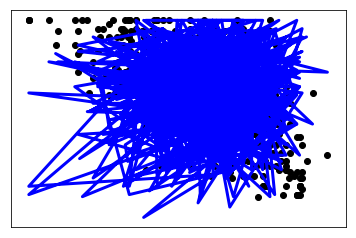

In [27]:
#confusion_matrix(training_scores_Y, testing_scores_Y)
pearsonr(training_scores_Y, testing_scores_Y)[0]


# The coefficients
print('Coefficients: \n', regression.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(testing_scores_Y, training_scores_Y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(testing_scores_Y, training_scores_Y))

# Plot outputs
plt.scatter(testing_data_X , testing_scores_Y ,  color='black')
plt.plot(testing_data_X, training_scores_Y, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 2. Apply Lesk’s algorithm to the words in the sentences.
In this step, we must first tokenize the sentences. 
We then apply pos_tag to determine the type of each word in the sentence; and apply lesk algorithm.
Then we take the sets to unique values and delete None element.
Finally, we compute the jaccard similarity as 1 - jaccard distance.

In [ ]:
def lesking_sentence(pos_tagged_sentence):
    """
    Returns a sentence as the given sentece using lesker algorithms.
    The input sentence must be a pos_tagged sentence (e.g. [('The', 'DN'),
    ('sun', 'NN')]).
    """
    sentence = [i[0] for i in pos_tagged_sentence]
    result = []
    
    none_type_objects = []
    for word, tag in pos_tagged_sentence:
        # 'NoneType' object has no attribute 'name'
        try:
            if tag.startswith('N'):
                result.append(lesk(sentence, word, wn.NOUN).name())
            #if word is a verb
            elif tag.startswith('V'):
                result.append(lesk(sentence, word, wn.VERB).name())
            #if word is an adjective
            elif tag.startswith('J'):
                result.append(lesk(sentence, word, wn.ADJ).name())
            #if word is a verb
            elif tag.startswith('R'):
                result.append(lesk(sentence, word, wn.ADV).name())
            else:
                result.append(word)
        except:
            print('EXEPTION ERROR:', word, tag)
            none_type_objects.append([word, tag, lesk(sentence, word, wn.NOUN)])
            
    return result

In [ ]:
for key in d:
    
    # Tokenizing
    sents = [nltk.word_tokenize(s) for s in d[key]];    
    
    w1 = sents[0]
    w2 = sents[1]

    # Determining the category of words
    wordtype1 = pos_tag(w1)    
    wordtype2 = pos_tag(w2)

    # As Lesk's algorithm works with synsets
    # Not every word will be accepted. Just nouns, verbs, adjectives and adverbs
    #determining the definition of words
    lesk1 = lesking_sentence(wordtype1)
    print('Post_Lesked_Sentence: ', lesk1, '\n')
    lesk2 = lesking_sentence(wordtype2)
    print('Post_Lesked_Sentence: ', lesk2, '\n')

    # Removing duplicates
    set1 = set(lesk1)
    set2 = set(lesk2)
    
    #computing jaccard similarity
    jaccard_similarity = 1 - jaccard_distance(set1, set2)
    tests.append(round(jaccard_similarity,3))
print(tests)

## 3. Compute their similarities via the Jaccard coefficient.

done previously within the loop

## 4. Compare the results with those in session 2 (document) and 3 (morphology) in which words and lemmas were considered.
The gold standard results would be 5,4,3,2,1,0.


In session 2 we got the following results:

* *'id1': 0.308* --> 1.54
* *'id2': 0.263* --> 1.31
* *'id3': 0.467* --> 2.34
* *'id4': 0.455* --> 2.27
* *'id5': 0.231* --> 1.15
* *'id6': 0.138* --> 0.69

In session 3, using lemmas similarity, we obtained:
* *'id1': 0.333* --> 1.67
* *'id2': 0.412* --> 2.06
* *'id3': 0.571* --> 2.86
* *'id4': 0.333* --> 1.67
* *'id5': 0.167* --> 0.84
* *'id6': 0.138* --> 0.69

And our current result is:
* *'id1': 0.333* --> 1.67
* *'id2': 0.375* --> 1.88
* *'id3': 0.571* --> 2.86
* *'id4': 0.273* --> 1.36
* *'id5': 0.167* --> 0.84
* *'id6': 0.103* --> 0.52

## 5. Compare the results with gold standard by giving the pearson correlation between them.
And now, we open the Golden Standard file and calculate the perason correlation with lesk.

In [ ]:
# CAREFUL WITH THE STS.gs FILE. 

# Golden Records file
golden_file = open('../00_data/test/STS.gs.MSRpar.txt','r')

for line in golden_file:
    line = line.strip().split("\t")
    golden_std.append(int(line[1]))

a = pearsonr(tests, golden_std)[0]
print('Pearson correlation with lesk:', round(a,3))
print(golden_std)

We compare the results with those in session 2 (document) and 3 (morphology) in which words and lemmas were considered:
- Pearson correlation without lemmatization: 0.396
- Pearson correlation with lemmatization: 0.578
- Pearson correlation with lesk: 0.668

This may also be to an improvement in our way of splitting the words and sorting the sentences that we have implemented in this lab. 

